In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import seaborn as sns
import glob
import cv2
import re
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tr_data = pd.read_csv('./train.csv') # reading the data 

In [3]:
st = tr_data.iloc[0,1]  

In [4]:
tr_data.head()

,Emotion,Pixels
0,3,221 240 251 254 255 255 255 255 255 255 255 25...
1,6,100 107 108 104 103 113 117 115 120 130 138 14...
2,4,35 50 56 57 63 76 74 79 85 86 105 133 145 152 ...
3,6,119 124 129 135 136 140 142 149 159 156 163 16...
4,2,160 173 186 194 188 185 175 162 153 143 135 12...


In [5]:
# to convert string to int
lis = st.split(" ")
lis1 = list(map(int,lis))
len(lis1) # size of the single image is 2304 pixels

2304

In [6]:
x = tr_data['Emotion'].value_counts()
x = x.to_frame()
x = x.reset_index()

In [9]:
x['index'] = x['index'].replace({6:'neutral',5:'surprise',4:'sad',3:'happy',2:'fear',1:'disgust',0:'anger'})

([<matplotlib.patches.Wedge at 0x7f7f06658e10>,
 [Text(0.6804673228717637, 0.8642709196216977, 'neutral'),
  Text(-0.7943063879675036, 0.7609713279973286, 'happy'),
  Text(-1.08746018626918, -0.16562108343867546, 'surprise'),
  Text(-0.7342798327663324, -0.8190440325114684, 'disgust'),
  Text(-0.061176018298315614, -1.0982975438309803, 'sad'),
  Text(0.625237761065019, -0.9050291388338844, 'anger'),
  Text(1.044566117135513, -0.344792150334717, 'fear')])

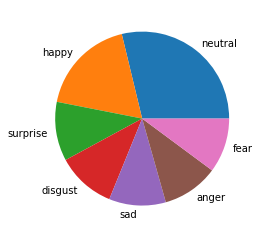

In [10]:
plt.pie(x['Emotion'], labels=x['index'])

In [38]:
48*48 # the image can be converted 48,48 because is image is of 2304 size pixel

2304

In [39]:
len(tr_data) # total images are 4178

4178

In [103]:
# converting all the string to list which are there in Pixels and appending to lis1
lis1 = []
for i in range(len(tr_data)):
    st = tr_data.iloc[i,1]
    lis = st.split(" ") # spliting the string with space 
    lis1.append(list(map(int,lis))) # converting the string values to integer

In [104]:
arr = np.array(lis1) # converting to array

In [105]:
df = pd.DataFrame(arr) # creating DataFrame of the above array
df.shape

(4178, 2304)

In [106]:
st = tr_data.iloc[:,0]
st.shape

(4178,)

In [107]:
df['emotions'] = st

In [108]:
df.shape

(4178, 2305)

# now we obtained the required DataFrame
## now we have to create single bin to each class based on emotions clasification

In [109]:
df['emotions'].value_counts() # the images are classified in 7 classes whiche are numbered from 0-6

6    1202
3     758
5     459
1     457
4     441
0     437
2     424
Name: emotions, dtype: int64

# from above we can say that there are total 7 classes ranged from 0-6
## now we have to create individual bin for each class

In [110]:
emo_0 = df[df['emotions']==0]
emo_1 = df[df['emotions']==1]
emo_2 = df[df['emotions']==2]
emo_3 = df[df['emotions']==3]
emo_4 = df[df['emotions']==4]
emo_5 = df[df['emotions']==5]
emo_6 = df[df['emotions']==6]

In [111]:
# another method of saving images into file
# fig = plt.figure()
# a = emo_0.iloc[0,:-1]
# b = a.values.reshape(48,48)
# c = plt.imshow(b)
# ax = c
# #ax = fig.add_subplot(ax)
# path = './data/face_data/angry/'
# fig.savefig(path +str(0)+ 'graph.png')

# saving images in related folders anger, disgust=1, fear=2, happy=3, sad=4, surprise=5, neutral=6)

In [112]:
for i in range(len(emo_0)):
    a = emo_0.iloc[i,:-1]
    b = a.values.reshape(48,48)
    #c = plt.imshow(b)

    path = './data/face_data/anger/'
    plt.imsave(path+str(i)+'_anger.png', b)


In [113]:
for i in range(len(emo_1)):
    a = emo_1.iloc[i,:-1]
    b = a.values.reshape(48,48)
    #c = plt.imshow(b)

    path = './data/face_data/disgust/'
    plt.imsave(path+str(i)+'_disgust.png', b)


In [114]:
for i in range(len(emo_2)):
    a = emo_2.iloc[i,:-1]
    b = a.values.reshape(48,48)
    #c = plt.imshow(b)

    path = './data/face_data/fear/'
    plt.imsave(path+str(i)+'_fear.png', b)


In [115]:
for i in range(len(emo_3)):
    a = emo_3.iloc[i,:-1]
    b = a.values.reshape(48,48)
    #c = plt.imshow(b)

    path = './data/face_data/happy/'
    plt.imsave(path+str(i)+'_happy.png', b)


In [116]:
for i in range(len(emo_4)):
    a = emo_4.iloc[i,:-1]
    b = a.values.reshape(48,48)
    #c = plt.imshow(b)

    path = './data/face_data/sad/'
    plt.imsave(path+str(i)+'_sad.png', b)


In [117]:
for i in range(len(emo_5)):
    a = emo_5.iloc[i,:-1]
    b = a.values.reshape(48,48)
    #c = plt.imshow(b)

    path = './data/face_data/surprise/'
    plt.imsave(path+str(i)+'_surprise.png', b)


In [118]:
for i in range(len(emo_6)):
    a = emo_6.iloc[i,:-1]
    b = a.values.reshape(48,48)
    #c = plt.imshow(b)

    path = './data/face_data/neutral/'
    plt.imsave(path+str(i)+'_neutral.png', b)


## this is how the image lookes after reshaping the pixels to 48x48

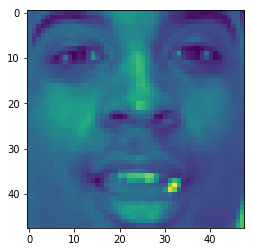

In [119]:
a = emo_5.iloc[4,:-1]
b = a.values.reshape(48,48)
c = plt.imshow(b)
c

In [120]:
import glob
import dlib
import cv2
import pickle
import random
import facevec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imutils import face_utils


In [121]:
def adjust_gamma(input_image, gamma=1.0):
    table = np.array([((iteration / 255.0) ** (1.0 / gamma)) * 255
                      for iteration in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(input_image, table)

In [122]:
def read_image(path, gamma=0.75):
    output = cv2.imread(path)
    return adjust_gamma(output, gamma=gamma)

In [123]:
def face_vector(input_image):
    faces = facevec.detector(input_image, 1)
    if not faces:
        return None

    f = faces[0]
    shape = facevec.predictor(input_image, f)
    face_descriptor = facevec.face_model.compute_face_descriptor(input_image, shape)
    return face_descriptor

# (beween 0 and 6: anger=0, disgust=1, fear=2, happy=3, sad=4, surprise=5, neutral=6)

In [124]:
anger = 0 
disgust = 1
fear = 2
happy = 3
sad = 4
surprise = 5
neutral = 6

In [125]:
print("Retrieving angry images ...")
sub1 = glob.glob("./data/face_data/anger/*.png")
print("Retrieved {} faces !".format(len(sub1)))

print("Retrieving disgust images ...")
sub2 = glob.glob("./data/face_data/disgust/*.png")
print("Retrieved {} faces !".format(len(sub2)))

print("Retrieving fear images ...")
sub3 = glob.glob("./data/face_data/fear/*.png")
print("Retrieved {} faces !".format(len(sub3)))

print("Retrieving happy images ...")
sub4 = glob.glob("./data/face_data/happy/*.png")
print("Retrieved {} faces !".format(len(sub4)))

print("Retrieving sad images ...")
sub5 = glob.glob("./data/face_data/sad/*.png")
print("Retrieved {} faces !".format(len(sub5)))

print("Retrieving surprise images ...")
sub6 = glob.glob("./data/face_data/surprise/*.png")
print("Retrieved {} faces !".format(len(sub6)))

print("Retrieving neutral images ...")
sub7 = glob.glob("./data/face_data/neutral/*.png")
print("Retrieved {} faces !".format(len(sub7)))



Retrieving angry images ...
Retrieved 437 faces !
Retrieving disgust images ...
Retrieved 457 faces !
Retrieving fear images ...
Retrieved 424 faces !
Retrieving happy images ...
Retrieved 758 faces !
Retrieving sad images ...
Retrieved 441 faces !
Retrieving surprise images ...
Retrieved 459 faces !
Retrieving neutral images ...
Retrieved 1202 faces !


In [126]:
vectors = dlib.vectors()
labels = dlib.array()

In [127]:
print("Reading anger images ...")
for i, sub in enumerate(sub1):
    print("Reading {} of {}\r".format(i, len(sub1)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(anger)

Reading anger images ...
Reading 0 of 437
Reading 1 of 437
Reading 2 of 437
Reading 3 of 437
Reading 4 of 437
Reading 5 of 437
Reading 6 of 437
Reading 7 of 437
Reading 8 of 437
Reading 9 of 437
Reading 10 of 437
Reading 11 of 437
Reading 12 of 437
Reading 13 of 437
Reading 14 of 437
Reading 15 of 437
Reading 16 of 437
Reading 17 of 437
Reading 18 of 437
Reading 19 of 437
Reading 20 of 437
Reading 21 of 437
Reading 22 of 437
Reading 23 of 437
Reading 24 of 437
Reading 25 of 437
Reading 26 of 437
Reading 27 of 437
Reading 28 of 437
Reading 29 of 437
Reading 30 of 437
Reading 31 of 437
Reading 32 of 437
Reading 33 of 437
Reading 34 of 437
Reading 35 of 437
Reading 36 of 437
Reading 37 of 437
Reading 38 of 437
Reading 39 of 437
Reading 40 of 437
Reading 41 of 437
Reading 42 of 437
Reading 43 of 437
Reading 44 of 437
Reading 45 of 437
Reading 46 of 437
Reading 47 of 437
Reading 48 of 437
Reading 49 of 437
Reading 50 of 437
Reading 51 of 437
Reading 52 of 437
Reading 53 of 437
Reading 54 of

In [128]:
print("Reading disgust images ...")
for i, sub in enumerate(sub2):
    print("Reading {} of {}\r".format(i, len(sub2)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(disgust)

Reading disgust images ...
Reading 0 of 457
Reading 1 of 457
Reading 2 of 457
Reading 3 of 457
Reading 4 of 457
Reading 5 of 457
Reading 6 of 457
Reading 7 of 457
Reading 8 of 457
Reading 9 of 457
Reading 10 of 457
Reading 11 of 457
Reading 12 of 457
Reading 13 of 457
Reading 14 of 457
Reading 15 of 457
Reading 16 of 457
Reading 17 of 457
Reading 18 of 457
Reading 19 of 457
Reading 20 of 457
Reading 21 of 457
Reading 22 of 457
Reading 23 of 457
Reading 24 of 457
Reading 25 of 457
Reading 26 of 457
Reading 27 of 457
Reading 28 of 457
Reading 29 of 457
Reading 30 of 457
Reading 31 of 457
Reading 32 of 457
Reading 33 of 457
Reading 34 of 457
Reading 35 of 457
Reading 36 of 457
Reading 37 of 457
Reading 38 of 457
Reading 39 of 457
Reading 40 of 457
Reading 41 of 457
Reading 42 of 457
Reading 43 of 457
Reading 44 of 457
Reading 45 of 457
Reading 46 of 457
Reading 47 of 457
Reading 48 of 457
Reading 49 of 457
Reading 50 of 457
Reading 51 of 457
Reading 52 of 457
Reading 53 of 457
Reading 54 

Reading 440 of 457
Reading 441 of 457
Reading 442 of 457
Reading 443 of 457
Reading 444 of 457
Reading 445 of 457
Reading 446 of 457
Reading 447 of 457
Reading 448 of 457
Reading 449 of 457
Reading 450 of 457
Reading 451 of 457
Reading 452 of 457
Reading 453 of 457
Reading 454 of 457
Reading 455 of 457
Reading 456 of 457


In [129]:
print("Reading fear images ...")
for i, sub in enumerate(sub3):
    print("Reading {} of {}\r".format(i, len(sub3)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(fear)

Reading fear images ...
Reading 0 of 424
Reading 1 of 424
Reading 2 of 424
Reading 3 of 424
Reading 4 of 424
Reading 5 of 424
Reading 6 of 424
Reading 7 of 424
Reading 8 of 424
Reading 9 of 424
Reading 10 of 424
Reading 11 of 424
Reading 12 of 424
Reading 13 of 424
Reading 14 of 424
Reading 15 of 424
Reading 16 of 424
Reading 17 of 424
Reading 18 of 424
Reading 19 of 424
Reading 20 of 424
Reading 21 of 424
Reading 22 of 424
Reading 23 of 424
Reading 24 of 424
Reading 25 of 424
Reading 26 of 424
Reading 27 of 424
Reading 28 of 424
Reading 29 of 424
Reading 30 of 424
Reading 31 of 424
Reading 32 of 424
Reading 33 of 424
Reading 34 of 424
Reading 35 of 424
Reading 36 of 424
Reading 37 of 424
Reading 38 of 424
Reading 39 of 424
Reading 40 of 424
Reading 41 of 424
Reading 42 of 424
Reading 43 of 424
Reading 44 of 424
Reading 45 of 424
Reading 46 of 424
Reading 47 of 424
Reading 48 of 424
Reading 49 of 424
Reading 50 of 424
Reading 51 of 424
Reading 52 of 424
Reading 53 of 424
Reading 54 of 

In [130]:
print("Reading happy images ...")
for i, sub in enumerate(sub4):
    print("Reading {} of {}\r".format(i, len(sub4)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(happy)

Reading happy images ...
Reading 0 of 758
Reading 1 of 758
Reading 2 of 758
Reading 3 of 758
Reading 4 of 758
Reading 5 of 758
Reading 6 of 758
Reading 7 of 758
Reading 8 of 758
Reading 9 of 758
Reading 10 of 758
Reading 11 of 758
Reading 12 of 758
Reading 13 of 758
Reading 14 of 758
Reading 15 of 758
Reading 16 of 758
Reading 17 of 758
Reading 18 of 758
Reading 19 of 758
Reading 20 of 758
Reading 21 of 758
Reading 22 of 758
Reading 23 of 758
Reading 24 of 758
Reading 25 of 758
Reading 26 of 758
Reading 27 of 758
Reading 28 of 758
Reading 29 of 758
Reading 30 of 758
Reading 31 of 758
Reading 32 of 758
Reading 33 of 758
Reading 34 of 758
Reading 35 of 758
Reading 36 of 758
Reading 37 of 758
Reading 38 of 758
Reading 39 of 758
Reading 40 of 758
Reading 41 of 758
Reading 42 of 758
Reading 43 of 758
Reading 44 of 758
Reading 45 of 758
Reading 46 of 758
Reading 47 of 758
Reading 48 of 758
Reading 49 of 758
Reading 50 of 758
Reading 51 of 758
Reading 52 of 758
Reading 53 of 758
Reading 54 of

Reading 436 of 758
Reading 437 of 758
Reading 438 of 758
Reading 439 of 758
Reading 440 of 758
Reading 441 of 758
Reading 442 of 758
Reading 443 of 758
Reading 444 of 758
Reading 445 of 758
Reading 446 of 758
Reading 447 of 758
Reading 448 of 758
Reading 449 of 758
Reading 450 of 758
Reading 451 of 758
Reading 452 of 758
Reading 453 of 758
Reading 454 of 758
Reading 455 of 758
Reading 456 of 758
Reading 457 of 758
Reading 458 of 758
Reading 459 of 758
Reading 460 of 758
Reading 461 of 758
Reading 462 of 758
Reading 463 of 758
Reading 464 of 758
Reading 465 of 758
Reading 466 of 758
Reading 467 of 758
Reading 468 of 758
Reading 469 of 758
Reading 470 of 758
Reading 471 of 758
Reading 472 of 758
Reading 473 of 758
Reading 474 of 758
Reading 475 of 758
Reading 476 of 758
Reading 477 of 758
Reading 478 of 758
Reading 479 of 758
Reading 480 of 758
Reading 481 of 758
Reading 482 of 758
Reading 483 of 758
Reading 484 of 758
Reading 485 of 758
Reading 486 of 758
Reading 487 of 758
Reading 488 

In [131]:
print("Reading sad images ...")
for i, sub in enumerate(sub5):
    print("Reading {} of {}\r".format(i, len(sub5)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(sad)

Reading sad images ...
Reading 0 of 441
Reading 1 of 441
Reading 2 of 441
Reading 3 of 441
Reading 4 of 441
Reading 5 of 441
Reading 6 of 441
Reading 7 of 441
Reading 8 of 441
Reading 9 of 441
Reading 10 of 441
Reading 11 of 441
Reading 12 of 441
Reading 13 of 441
Reading 14 of 441
Reading 15 of 441
Reading 16 of 441
Reading 17 of 441
Reading 18 of 441
Reading 19 of 441
Reading 20 of 441
Reading 21 of 441
Reading 22 of 441
Reading 23 of 441
Reading 24 of 441
Reading 25 of 441
Reading 26 of 441
Reading 27 of 441
Reading 28 of 441
Reading 29 of 441
Reading 30 of 441
Reading 31 of 441
Reading 32 of 441
Reading 33 of 441
Reading 34 of 441
Reading 35 of 441
Reading 36 of 441
Reading 37 of 441
Reading 38 of 441
Reading 39 of 441
Reading 40 of 441
Reading 41 of 441
Reading 42 of 441
Reading 43 of 441
Reading 44 of 441
Reading 45 of 441
Reading 46 of 441
Reading 47 of 441
Reading 48 of 441
Reading 49 of 441
Reading 50 of 441
Reading 51 of 441
Reading 52 of 441
Reading 53 of 441
Reading 54 of 4

Reading 439 of 441
Reading 440 of 441


In [132]:
print("Reading surprise images ...")
for i, sub in enumerate(sub6):
    print("Reading {} of {}\r".format(i, len(sub6)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(surprise)

Reading surprise images ...
Reading 0 of 459
Reading 1 of 459
Reading 2 of 459
Reading 3 of 459
Reading 4 of 459
Reading 5 of 459
Reading 6 of 459
Reading 7 of 459
Reading 8 of 459
Reading 9 of 459
Reading 10 of 459
Reading 11 of 459
Reading 12 of 459
Reading 13 of 459
Reading 14 of 459
Reading 15 of 459
Reading 16 of 459
Reading 17 of 459
Reading 18 of 459
Reading 19 of 459
Reading 20 of 459
Reading 21 of 459
Reading 22 of 459
Reading 23 of 459
Reading 24 of 459
Reading 25 of 459
Reading 26 of 459
Reading 27 of 459
Reading 28 of 459
Reading 29 of 459
Reading 30 of 459
Reading 31 of 459
Reading 32 of 459
Reading 33 of 459
Reading 34 of 459
Reading 35 of 459
Reading 36 of 459
Reading 37 of 459
Reading 38 of 459
Reading 39 of 459
Reading 40 of 459
Reading 41 of 459
Reading 42 of 459
Reading 43 of 459
Reading 44 of 459
Reading 45 of 459
Reading 46 of 459
Reading 47 of 459
Reading 48 of 459
Reading 49 of 459
Reading 50 of 459
Reading 51 of 459
Reading 52 of 459
Reading 53 of 459
Reading 54

Reading 440 of 459
Reading 441 of 459
Reading 442 of 459
Reading 443 of 459
Reading 444 of 459
Reading 445 of 459
Reading 446 of 459
Reading 447 of 459
Reading 448 of 459
Reading 449 of 459
Reading 450 of 459
Reading 451 of 459
Reading 452 of 459
Reading 453 of 459
Reading 454 of 459
Reading 455 of 459
Reading 456 of 459
Reading 457 of 459
Reading 458 of 459


In [133]:
print("Reading neutral images ...")
for i, sub in enumerate(sub7):
    print("Reading {} of {}\r".format(i, len(sub7)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(neutral)

Reading neutral images ...
Reading 0 of 1202
Reading 1 of 1202
Reading 2 of 1202
Reading 3 of 1202
Reading 4 of 1202
Reading 5 of 1202
Reading 6 of 1202
Reading 7 of 1202
Reading 8 of 1202
Reading 9 of 1202
Reading 10 of 1202
Reading 11 of 1202
Reading 12 of 1202
Reading 13 of 1202
Reading 14 of 1202
Reading 15 of 1202
Reading 16 of 1202
Reading 17 of 1202
Reading 18 of 1202
Reading 19 of 1202
Reading 20 of 1202
Reading 21 of 1202
Reading 22 of 1202
Reading 23 of 1202
Reading 24 of 1202
Reading 25 of 1202
Reading 26 of 1202
Reading 27 of 1202
Reading 28 of 1202
Reading 29 of 1202
Reading 30 of 1202
Reading 31 of 1202
Reading 32 of 1202
Reading 33 of 1202
Reading 34 of 1202
Reading 35 of 1202
Reading 36 of 1202
Reading 37 of 1202
Reading 38 of 1202
Reading 39 of 1202
Reading 40 of 1202
Reading 41 of 1202
Reading 42 of 1202
Reading 43 of 1202
Reading 44 of 1202
Reading 45 of 1202
Reading 46 of 1202
Reading 47 of 1202
Reading 48 of 1202
Reading 49 of 1202
Reading 50 of 1202
Reading 51 of 

Reading 418 of 1202
Reading 419 of 1202
Reading 420 of 1202
Reading 421 of 1202
Reading 422 of 1202
Reading 423 of 1202
Reading 424 of 1202
Reading 425 of 1202
Reading 426 of 1202
Reading 427 of 1202
Reading 428 of 1202
Reading 429 of 1202
Reading 430 of 1202
Reading 431 of 1202
Reading 432 of 1202
Reading 433 of 1202
Reading 434 of 1202
Reading 435 of 1202
Reading 436 of 1202
Reading 437 of 1202
Reading 438 of 1202
Reading 439 of 1202
Reading 440 of 1202
Reading 441 of 1202
Reading 442 of 1202
Reading 443 of 1202
Reading 444 of 1202
Reading 445 of 1202
Reading 446 of 1202
Reading 447 of 1202
Reading 448 of 1202
Reading 449 of 1202
Reading 450 of 1202
Reading 451 of 1202
Reading 452 of 1202
Reading 453 of 1202
Reading 454 of 1202
Reading 455 of 1202
Reading 456 of 1202
Reading 457 of 1202
Reading 458 of 1202
Reading 459 of 1202
Reading 460 of 1202
Reading 461 of 1202
Reading 462 of 1202
Reading 463 of 1202
Reading 464 of 1202
Reading 465 of 1202
Reading 466 of 1202
Reading 467 of 1202


Reading 833 of 1202
Reading 834 of 1202
Reading 835 of 1202
Reading 836 of 1202
Reading 837 of 1202
Reading 838 of 1202
Reading 839 of 1202
Reading 840 of 1202
Reading 841 of 1202
Reading 842 of 1202
Reading 843 of 1202
Reading 844 of 1202
Reading 845 of 1202
Reading 846 of 1202
Reading 847 of 1202
Reading 848 of 1202
Reading 849 of 1202
Reading 850 of 1202
Reading 851 of 1202
Reading 852 of 1202
Reading 853 of 1202
Reading 854 of 1202
Reading 855 of 1202
Reading 856 of 1202
Reading 857 of 1202
Reading 858 of 1202
Reading 859 of 1202
Reading 860 of 1202
Reading 861 of 1202
Reading 862 of 1202
Reading 863 of 1202
Reading 864 of 1202
Reading 865 of 1202
Reading 866 of 1202
Reading 867 of 1202
Reading 868 of 1202
Reading 869 of 1202
Reading 870 of 1202
Reading 871 of 1202
Reading 872 of 1202
Reading 873 of 1202
Reading 874 of 1202
Reading 875 of 1202
Reading 876 of 1202
Reading 877 of 1202
Reading 878 of 1202
Reading 879 of 1202
Reading 880 of 1202
Reading 881 of 1202
Reading 882 of 1202


In [134]:
type(vectors)

dlib.vectors

In [135]:
vec = np.array(vectors)

In [173]:
lab = np.array(labels)
lab.shape

(3198,)

In [137]:
vec.shape

(3198, 128)

In [138]:
lab.shape

(3198,)

In [174]:
X = vec
y = lab

In [175]:
X.shape , y.shape

((3198, 128), (3198,))

In [176]:
dataset = np.append(X,y,axis = 1)

ValueError: all the input arrays must have same number of dimensions

In [177]:
np.savetxt('face_vectors.csv',dataset,delimiter = ',')

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [181]:
from sklearn.neighbors import KNeighborsClassifier


In [305]:
model_knn = KNeighborsClassifier(n_neighbors=23)


In [306]:
model_knn.fit(x_train, y_train) # training model



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [307]:
y_pred_knn = model_knn.predict(x_test) # we use this for evaluation


In [308]:
from sklearn.metrics import confusion_matrix, classification_report
from pandas_ml import ConfusionMatrix


In [309]:
y_test.shape

(640,)

In [310]:
cm_knn = ConfusionMatrix(y_test, y_pred_knn) # confusion matrix


cr_knn = classification_report(y_test, y_pred_knn) # classification report

In [311]:
cm_knn.stats_overall

/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.525),
             ('95% CI', (0.48549072566557944, 0.5642776903733913)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.009818786416358223),
             ('Kappa', 0.4047895838177168),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [312]:
import seaborn as sns

In [313]:
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'summer')
plt.title('K Nearest Neighbour')
plt.show()

ValueError: Must pass 2-d input

In [314]:
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)

====================KNearest Neighbour====================
              precision    recall  f1-score   support

         0.0       0.43      0.43      0.43        68
         1.0       0.74      0.50      0.60        90
         2.0       0.29      0.15      0.20        46
         3.0       0.63      0.43      0.51       122
         4.0       0.29      0.19      0.23        79
         5.0       0.65      0.55      0.60        56
         6.0       0.51      0.88      0.65       179

   micro avg       0.53      0.53      0.53       640
   macro avg       0.51      0.45      0.46       640
weighted avg       0.53      0.53      0.50       640



In [315]:
from sklearn.externals import joblib

In [316]:
joblib.dump(model_knn,'emotion_class.pkl')

['emotion_class.pkl']